In [51]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [52]:
face_cascade=cv2.CascadeClassifier('C:\\Users\\HP\\Desktop\\face_recognition\\haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('C:\\Users\\HP\\Desktop\\face_recognition\\haarcascade_eye.xml')

In [65]:
import numpy as np
import cv2

img = cv2.imread('C:\\Users\\HP\\Desktop\\face_recognition\\miku.CR2')
img.shape

(3456, 5184, 3)

In [66]:
#img=cv2.resize(img,(256,256))

In [67]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

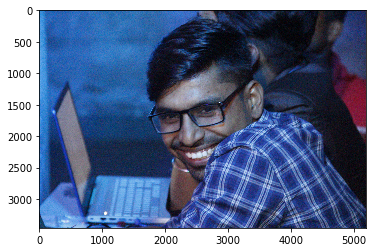

In [68]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [69]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [70]:
gray

array([[158, 158, 158, ...,  48,  48,  54],
       [154, 155, 157, ...,  49,  49,  53],
       [156, 158, 161, ...,  48,  48,  52],
       ...,
       [ 60,  58,  59, ...,  22,  21,  18],
       [ 63,  60,  61, ...,  22,  22,  20],
       [ 68,  64,  65, ...,  18,  19,  16]], dtype=uint8)

In [71]:
faces=[]
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)
print(len(faces))
start_row,start_col,end_row,end_col=faces[0]

[[1617 1044 1551 1551]
 [1175 2863   80   80]
 [1158 2949   86   86]
 [1437 2876   89   89]
 [1114 3169   84   84]
 [1127 3103   89   89]
 [1120 3137   89   89]]
7


In [72]:
print(start_row)
print(start_col)
print(end_row)
print(end_col)

1617
1044
1551
1551


In [73]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)



In [74]:
path='C:\\Users\\HP\\Desktop\\face_recognition\\cropped_image_database'

In [75]:
cropped=gray[start_col:start_col+end_col,start_row:start_row+end_row]
cropped=cv2.resize(cropped,(256,256))
img_name = "opencv_frame_{}.png".format(input())
cv2.imwrite(path+'/'+str(img_name), cropped)
print("{} written!".format(img_name))

miku
opencv_frame_miku.png written!


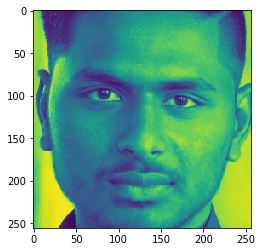

In [50]:
plt.imshow(cropped)

In [32]:
cropped.shape

(64, 64)

In [33]:
path='C:\\Users\\HP\\Desktop\\face_recognition\\cropped_image_database'
plt.savefig('cropped')

<Figure size 432x288 with 0 Axes>

In [34]:
cv2.imshow('img',gray)
cv2.waitKey(0)
cv2.imshow('cropped',cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()